In [2]:
from PIL import Image

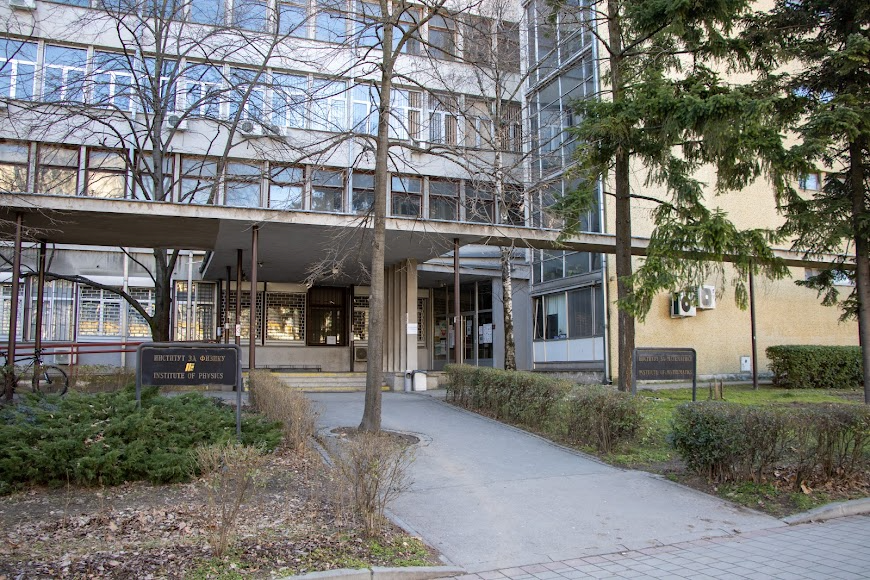

In [3]:
img = Image.open("sus.png")
img

In [12]:
img.size

(870, 580)

In [10]:
img_pixels = img.load()
print(img_pixels[0, 0])

(161, 165, 177, 255)


Сваки елемент у матрици је `RGBA`.

Вероватно се порука крије у неком од Least Significant Bit-ова, па их треба
извући.

00000001
1


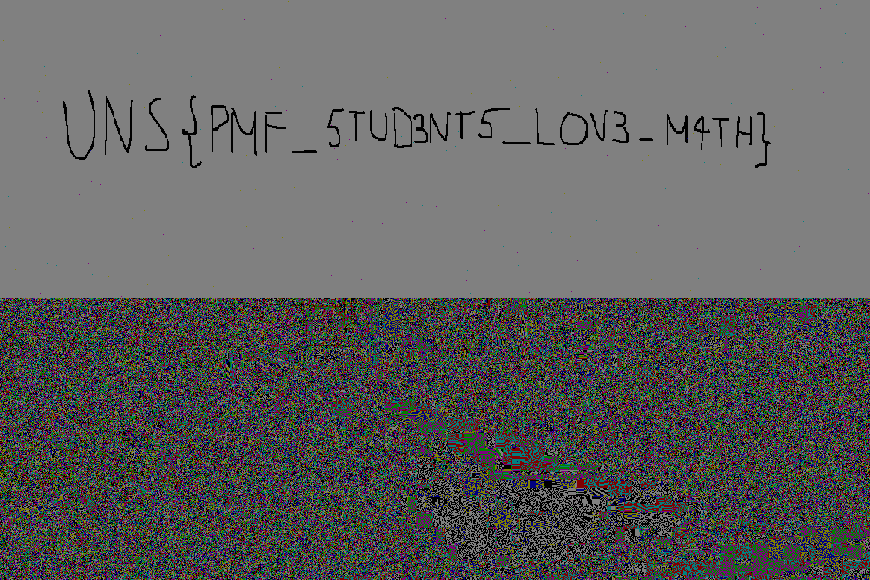

In [94]:
def bit_thing(n):
    '''
    ## Desc

    For a given `n`, create a binary number:

    ```
        000..00111..11
        |______|_____|
          8-n     n
    ```

    And return its decimal value.
    '''

    s = '0' * (8-n) + '1' * (n)
    print(s)
    q = 0
    k = 0
    for c in s[::-1]:
        if c == '1':
            q += 2 ** k
        k += 1
    print(q)
    return q

def build_image_with_nth_lsb(image_pixels, w, h, n):
    MASK = bit_thing(n)
    for y in range(h):
        for x in range(w):
            r, g, b, a = image_pixels[x, y]
            image_pixels[x, y] = ((r & MASK) << (8-n), (g & MASK) << (8-n), (b & MASK) << (8-n), a)

img = Image.open("sus.png")
img_pixels_1 = img.load()
build_image_with_nth_lsb(img_pixels_1, img.size[0], img.size[1], 1)
img.save("sus_solution.png")
img